### Read the “housing.csv” file from the folder into the program.

In [2]:
import pandas as pd
import numpy as np

In [32]:
housing=pd.read_excel("F:\\DS\\Python_datasets\\California_housing.xlsx")
df=pd.DataFrame(housing)

### Print first few rows of this data.


In [4]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Handle missing values

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [33]:
#total_rooms has missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
#207 missing records.

### Handle missing values : Fill the missing values with the mean of the respective column.

In [202]:
housing.total_bedrooms.mean()
print(housing.median_house_value.mean(),housing.median_house_value.median())

206855.81690891474 179700.0


In [36]:
df[['total_bedrooms']]=df[['total_bedrooms']].fillna(housing.total_bedrooms.mean())


In [37]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Encode categorical data :Convert categorical column in the dataset to numerical data.

In [133]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

### Extract input (X) and output (Y) data from the dataset.

In [134]:
X=df.drop(columns =['median_house_value'])
Y=df.median_house_value


### Split the dataset : Split the data into 80% training dataset and 20% test dataset.

In [54]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
y_train

14196    103000
8267     382100
17445    172600
14265     93400
2271      96500
          ...  
11284    229200
11964     97800
5390     222100
860      283500
15795    325000
Name: median_house_value, Length: 16512, dtype: int64

### Standardize data :Standardize training and test datasets.

In [59]:
from sklearn.preprocessing import StandardScaler 
stand=StandardScaler()

In [136]:
stand.fit_transform(X_train,X_test)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.32290591,
        -0.326196  ,  2.00593172],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.6720272 ,
        -0.03584338,  2.00593172],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.43046109,
         0.14470145,  2.00593172],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.07090859,
        -0.49697313, -0.81854604],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.15490769,
         0.96545045, -0.81854604],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.94776365,
        -0.68544764,  1.29981228]])

In [79]:
train_std_df=pd.DataFrame(X_train.drop(column=('ocean_proximity'))
train_std_df
test_std_df=pd.DataFrame(X_test)
test_std_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25,1505,537.870553,1392,359,1.6812,0,1,0,0,0
3024,-119.46,35.14,30,2943,537.870553,1565,584,2.5313,0,1,0,0,0
15663,-122.44,37.80,52,3830,537.870553,1310,963,3.4801,0,0,0,1,0
20484,-118.72,34.28,17,3051,537.870553,1705,495,5.7376,1,0,0,0,0
9814,-121.93,36.62,34,2351,537.870553,1063,428,3.7250,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16,3165,482.000000,1351,452,4.6050,1,0,0,0,0
16623,-120.83,35.36,28,4323,886.000000,1650,705,2.7266,0,0,0,0,1
18086,-122.05,37.31,25,4111,538.000000,1585,568,9.2298,1,0,0,0,0
2144,-119.76,36.77,36,2507,466.000000,1227,474,2.7850,0,1,0,0,0


### Perform Linear Regression : Perform Linear Regression on training data.

In [ ]:
##We will check the relationship between different ariables to undersatnd which variable shouldn't be using in our model.

<AxesSubplot:>

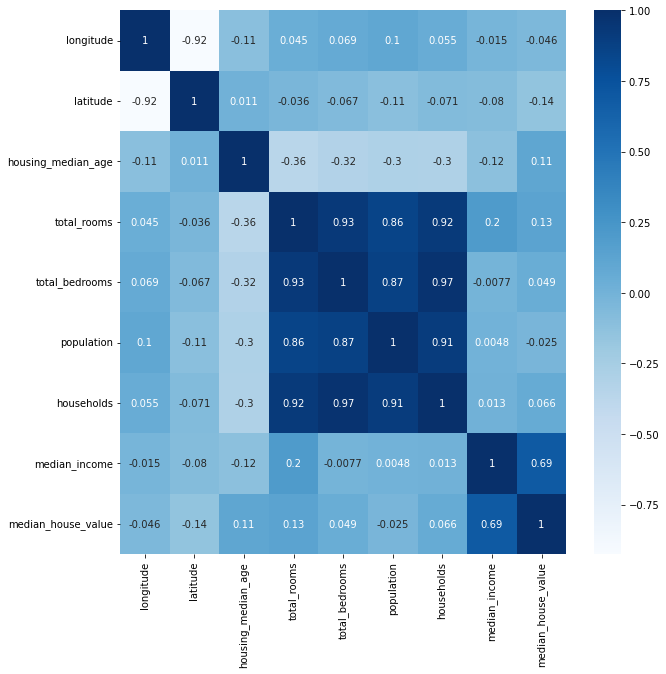

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(housing.drop(columns='ocean_proximity').corr(), annot=True,cmap='Blues')

In [113]:
x_train1='+'.join(train_std_df.drop(columns=['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']).columns)
x_train1

'longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income'

In [102]:
'median_house_value ~' +'+'.join(train_std_df.drop(columns=['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']).columns)

'median_house_value ~longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income'

In [110]:
from statsmodels.formula.api import ols
mod = ols('median_house_value ~' +'+'.join(train_std_df.drop(columns=['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']).columns),data=df1)
lm_fit = mod.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4499.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:20   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.571e+06   6.26e+04    -57.035      0.000   -3.69e+06   -3.45e+06
longitude          -4.262e+04    714.112    -59.685      0.000    -4.4e+04   -4.12e+04
latitude           -4.248e+04    674.532    -62.976      0.000   -4.38e+04   -4.12e+04
housing_median_age  1144.4786     43.236     26.471      0.000    1059.733    1229.224
total_rooms           -6.6806      0.775     -8.621      0.000      -8.199      -5.162
total_bedrooms        82.4636      6.047     13.636      0.000      70.610      94.317
population           -39.8333      1.072    -37.164      0.000     -41.934     -37.732
households            78.1123      6.784     11.514      0.000      64.815      91.410
median_income       3.977e+04    331.942    119.815      0.000    3.91e+04    4.04e+04
==============================================================================
Omnibus:                     5040.064   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18972.448
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.056   Cond. No.                     5.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [118]:
model.fit(train_std_df, y_train)

LinearRegression()

In [119]:
print(model.coef_) ###Bnot values

[-2.68382734e+04 -2.54683520e+04  1.10218508e+03 -6.02150567e+00
  1.02789395e+02 -3.81729064e+01  4.82527528e+01  3.94739752e+04
 -1.89265829e+04 -5.87132390e+04  1.17198490e+05 -2.40632251e+04
 -1.54954428e+04]


In [120]:
pd.DataFrame(model.coef_, train_std_df.columns, columns = ['Coeff'])

,Coeff
longitude,-26838.273372
latitude,-25468.352050
housing_median_age,1102.185084
total_rooms,-6.021506
total_bedrooms,102.789395
population,-38.172906
households,48.252753
median_income,39473.975175
ocean_proximity_<1H OCEAN,-18926.582862
ocean_proximity_INLAND,-58713.239023


### predict

In [194]:
predictions = model.predict(test_std_df)

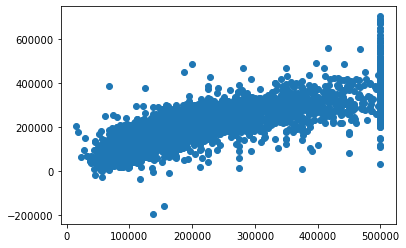

In [195]:
plt.scatter(y_test, predictions)

(array([   4.,   18.,  249., 1935., 1422.,  334.,  122.,   35.,    7.,
           2.]),
 array([-318233.77008005, -239928.616191  , -161623.46230195,
         -83318.3084129 ,   -5013.15452386,   73291.99936519,
         151597.15325424,  229902.30714329,  308207.46103233,
         386512.61492138,  464817.76881043]),
 <BarContainer object of 10 artists>)

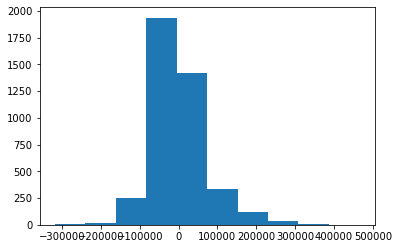

In [200]:
plt.hist(y_test - predictions)

### Print root mean squared error (RMSE) from Linear Regression.

In [131]:
from sklearn.metrics import mean_squared_error,r2_score

In [197]:
import math as m
m.sqrt(mean_squared_error(y_test,predictions))

70031.41991955669

In [203]:
70000/200000

0.35

In [198]:
print((r2_score(y_test,predictions)))

0.62573518211597


### Extract just the median_income column from the independent variables (from X_train and X_test).

In [186]:
x1=df[['median_income']]

y1=df[['median_house_value']]

print(x1.shape)
print(y1.shape)
X_train1, X_test1, y_train1,y_test1 = train_test_split(x1,y1,test_size=.20,random_state=42)
print(X_train1.shape)
print(y_train1.shape)
#tand.fit_transform(X_train1,X_test1)

#ain_std1=pd.DataFrame()
#rain_std1


(20640, 1)
(20640, 1)
(16512, 1)
(16512, 1)


### Perform Linear Regression to predict housing values based on median_income.

In [145]:
model2 = LinearRegression()

In [187]:
model2.fit(X_train1,y_train1)


LinearRegression()

### Predict output for test dataset using the fitted model.

In [189]:
predict1=model2.predict(X_test1)

### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

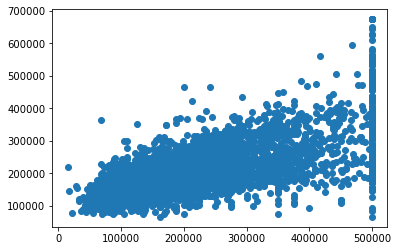

In [190]:
plt.scatter(y_test1, predict1)

In [210]:
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import math as m
m.sqrt(mean_squared_error(y_test1,predict1))


84209.01241414454

In [205]:
R2=(r2_score(y_test1,predict1))
R2

0.45885918903846656

In [211]:
#


AttributeError: 'LinearRegression' object has no attribute 'rsquared_adj'